<a href="https://colab.research.google.com/github/okaybuyukdeveci/MLprojects/blob/main/Customer_Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Modelling with Deep Learning

In [1]:
# Import the libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data

dataset = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/refs/heads/master/Customer_Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
X = dataset.iloc[:,3:-1]
y = dataset['Exited']

In [4]:
exited_counts = dataset['Exited'].value_counts()
exited_counts

,count
Exited,
0,7963
1,2037


In [5]:
len(dataset)

10000

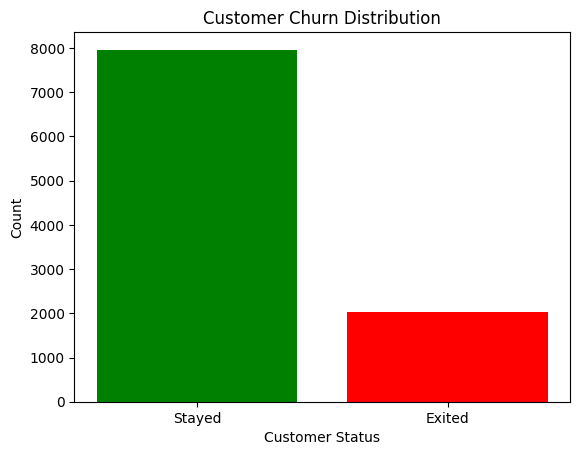

In [6]:
plt.bar(exited_counts.index, exited_counts.values,color=['green','red'])
plt.xticks([0,1],['Stayed','Exited'])
plt.title('Customer Churn Distribution')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.show()

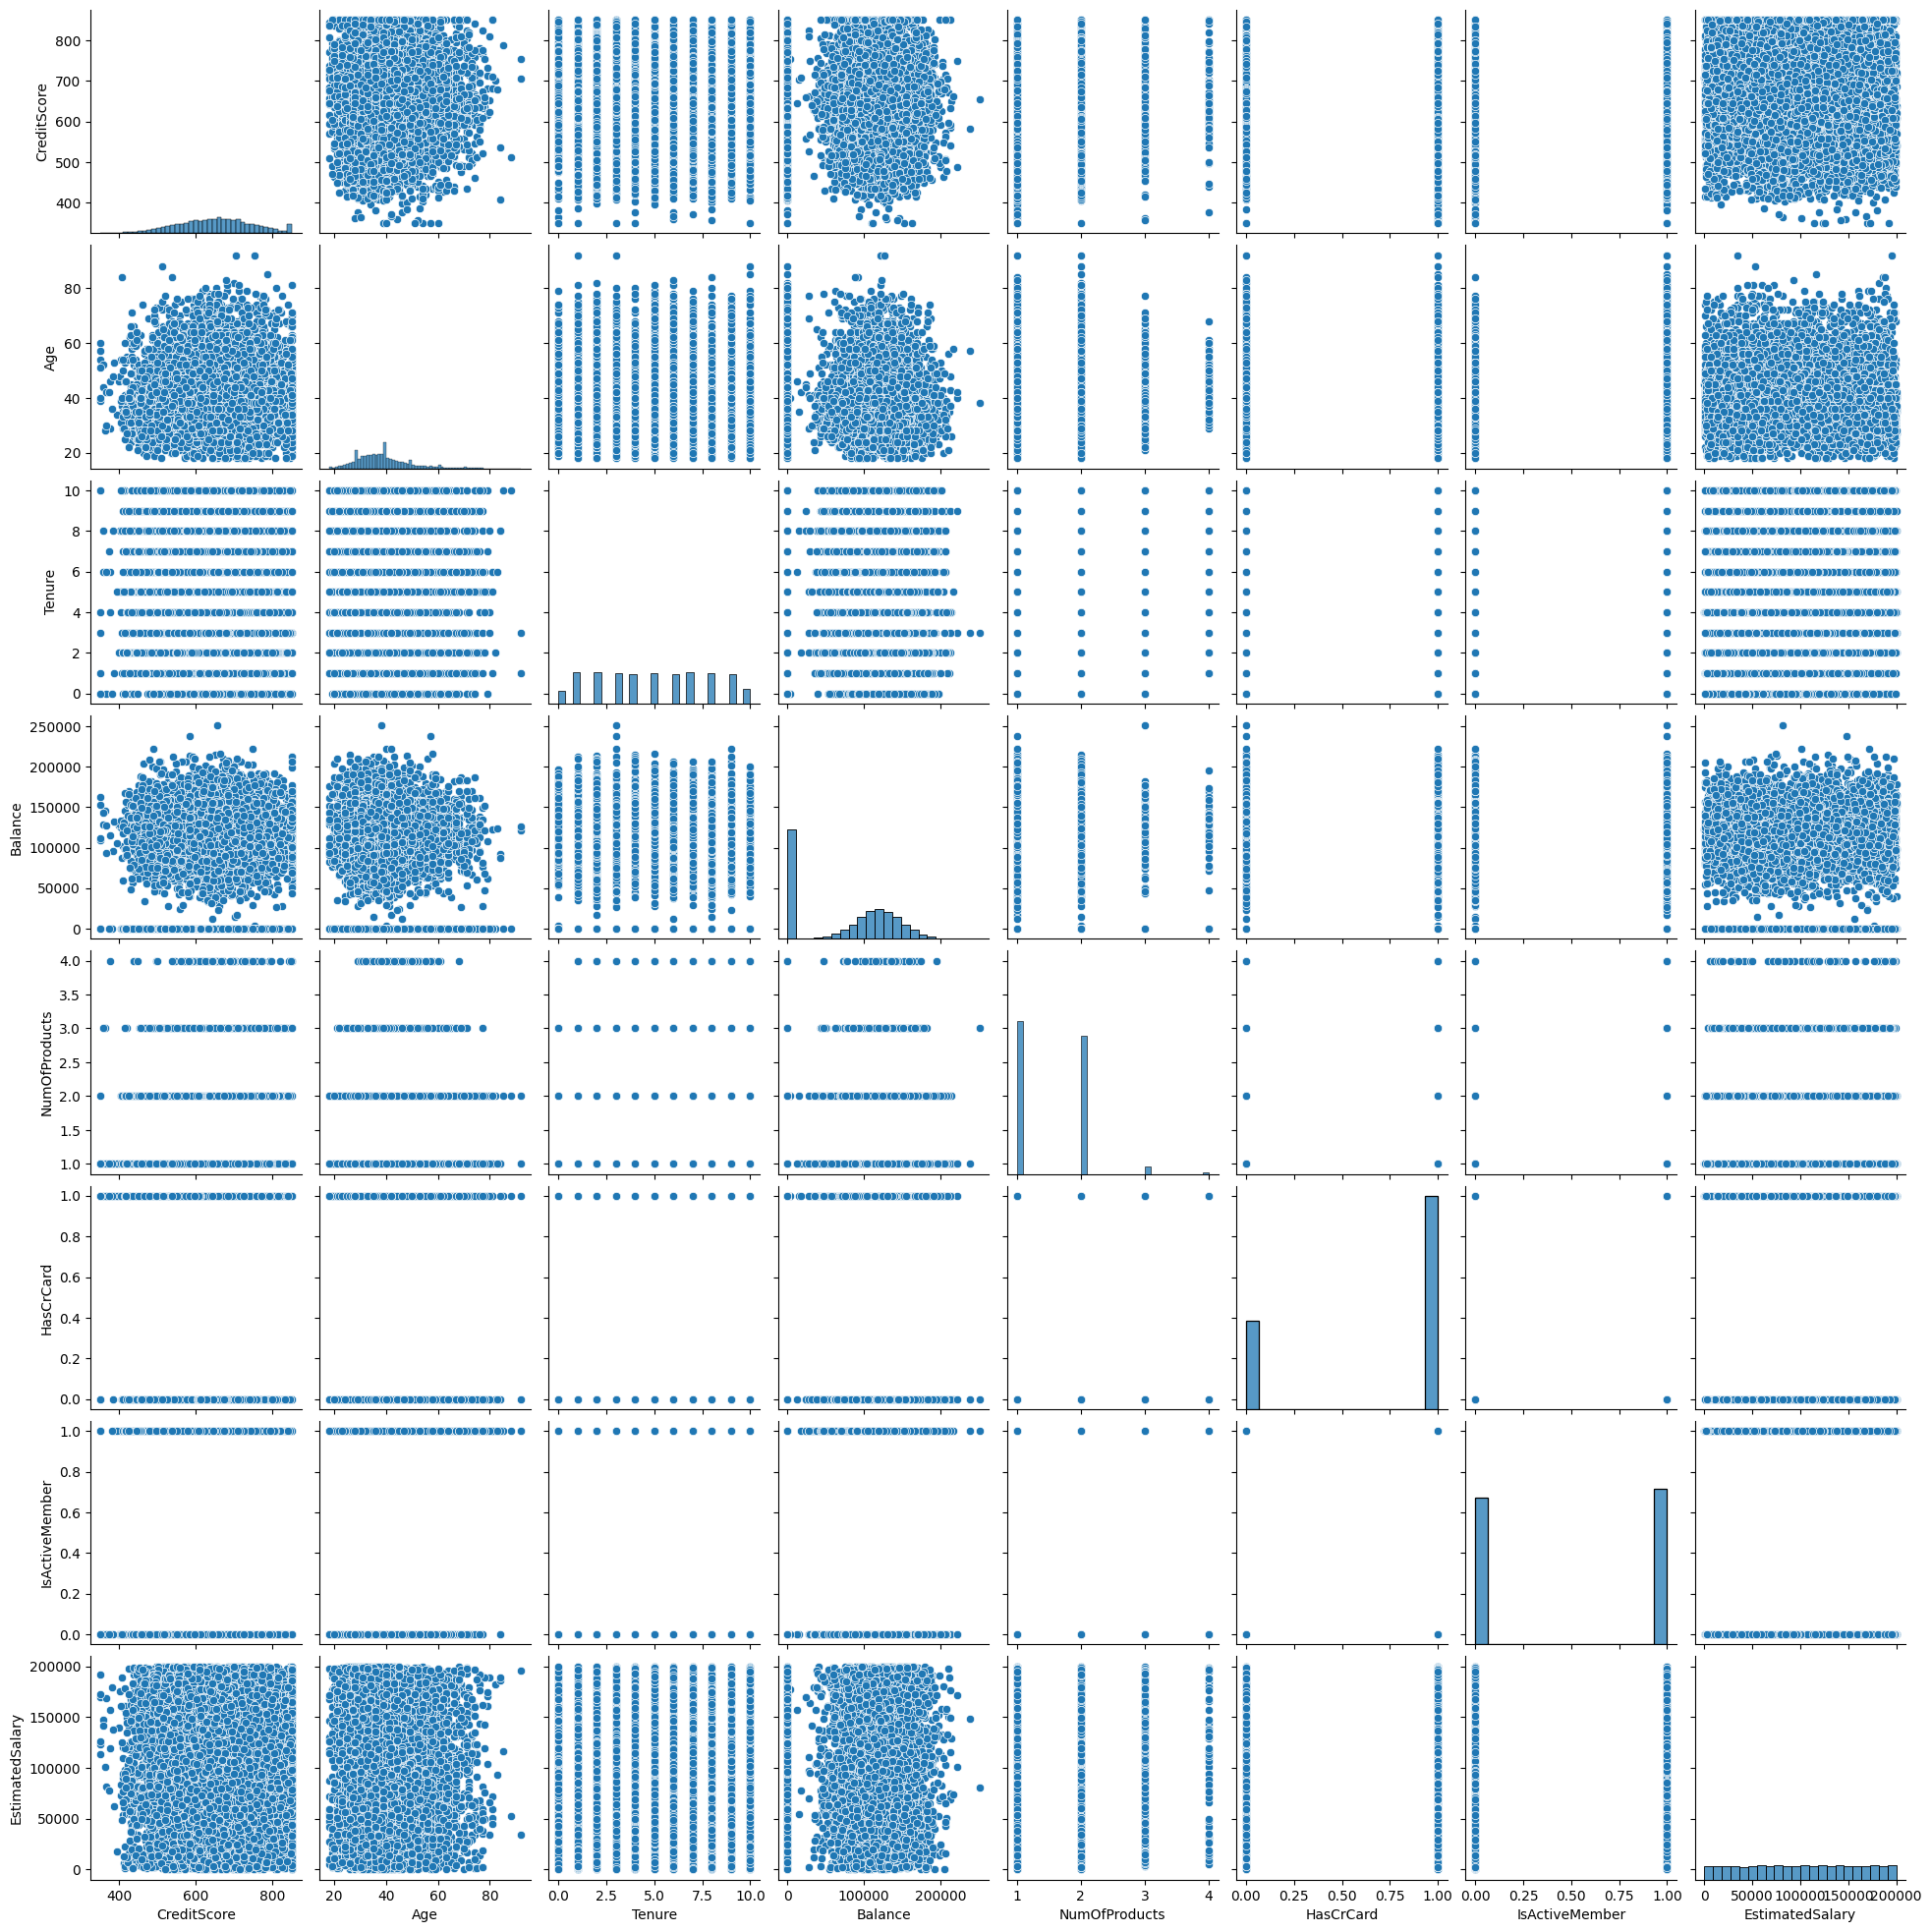

In [7]:
sns.pairplot(X)

## Data Preprocessing


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X_onehot = pd.get_dummies(X, drop_first=True)
X_onehot

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [14]:
X_train, X_test,y_train,y_test = train_test_split(X_onehot,y,test_size =0.2,stratify=y)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Build ANN

In [18]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, InputLayer
from tensorflow.keras.optimizers import Adam

In [49]:
model_1 = Sequential()
model_1.add(InputLayer(shape=X_train.shape[1:]))
model_1.add(Dense(128,activation='relu'))
model_1.add(Dense(128,activation='relu'))
model_1.add(Dense(1,activation='sigmoid'))

In [50]:
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,177 (71.00 KB)

 Trainable params: 18,177 (71.00 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model_1.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


In [66]:
history_1=model_1.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8733 - loss: 0.3101 - val_accuracy: 0.8480 - val_loss: 0.3481
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8708 - loss: 0.3150 - val_accuracy: 0.8455 - val_loss: 0.3515
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8766 - loss: 0.3027 - val_accuracy: 0.8460 - val_loss: 0.3518
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8801 - loss: 0.2961 - val_accuracy: 0.8450 - val_loss: 0.3541
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8770 - loss: 0.2945 - val_accuracy: 0.8450 - val_loss: 0.3514
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8765 - loss: 0.3024 - val_accuracy: 0.8500 - val_loss: 0.3531
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8812 - loss: 0.2858 - val_accuracy: 0.8475 - val_loss: 0.3562
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8743 - loss: 0.3018 - val_accuracy: 0.

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [117]:
y_pred= model_1.predict(X_test)
y_pred = (y_pred>0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1593
           1       0.65      0.50      0.57       407

    accuracy                           0.84      2000
   macro avg       0.77      0.72      0.74      2000
weighted avg       0.83      0.84      0.84      2000



In [54]:
import pickle
import os

model_1.save('churn_model.h5')
pickle.dump(scaler,open('scaler.pkl','wb'))

In [93]:
# model_2

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

inputs = Input(shape=X_train.shape[1:])
x = Dense(128,activation='relu')(inputs)
x = Dropout(0.3)(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1,activation ='sigmoid')(x)

model_2= Model(inputs,outputs)


In [95]:
model_2.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)          │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,177 (71.00 KB)

 Trainable params: 18,177 (71.00 KB)

 Non-trainable params: 0 (0.00 B)

In [125]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor ='val_loss', patience =3,restore_best_weights =True)
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history_2 = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,epochs=10,callbacks=[early_stopping])

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9664 - loss: 0.0912 - val_accuracy: 0.8185 - val_loss: 0.7721
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9646 - loss: 0.0896 - val_accuracy: 0.8155 - val_loss: 0.7748
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9635 - loss: 0.0876 - val_accuracy: 0.7990 - val_loss: 0.8069
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9669 - loss: 0.0902 - val_accuracy: 0.8235 - val_loss: 0.8156


In [119]:
y_pred_2= model_2.predict(X_test)
y_pred_2 = (y_pred_2>0.5).astype(int)
y_pred_2

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [114]:
from tensorflow.keras.layers import Dropout

inputs = Input(shape=X_train.shape[1:])
x = Dense(128,activation='relu')(inputs)
x = Dense(128,activation='relu')(x)
x = Dense(128,activation='relu')(x)

outputs = Dense(1,activation ='sigmoid')(x)

model_3= Model(inputs,outputs)

model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history_3 = model_3.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,epochs=10,callbacks=[early_stopping])

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7754 - loss: 0.5612 - val_accuracy: 0.8035 - val_loss: 0.4500
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8086 - loss: 0.4335 - val_accuracy: 0.8225 - val_loss: 0.4235
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8318 - loss: 0.3934 - val_accuracy: 0.8250 - val_loss: 0.4070
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8407 - loss: 0.3784 - val_accuracy: 0.8365 - val_loss: 0.3904
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8495 - loss: 0.3631 - val_accuracy: 0.8430 - val_loss: 0.3749
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8571 - loss: 0.3499 - val_accuracy: 0.8415 - val_loss: 0.3665
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8634 - loss: 0.3402 - val_accuracy: 0.8390 - val_loss: 0.3622
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8651 - loss: 0.3377 - val_accuracy: 0.

In [121]:
y_pred_3= model_3.predict(X_test)
y_pred_3 = (y_pred_3>0.5).astype(int)
y_pred_3

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [108]:
import matplotlib.pyplot as plt


def compare_historys(original_history, new_history):
    """
    Compares two TensorFlow model History objects.

    Args:
      original_history: History object from original model
      new_history: History object from continued model training
    """

    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Create plots
    plt.figure(figsize=(8, 8))

    # Plotting accuracy
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('Accuracy')

    # Plotting loss
    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.ylabel('Loss')

    # Show the plots
    plt.subplots_adjust(hspace=0.4)
    plt.show()


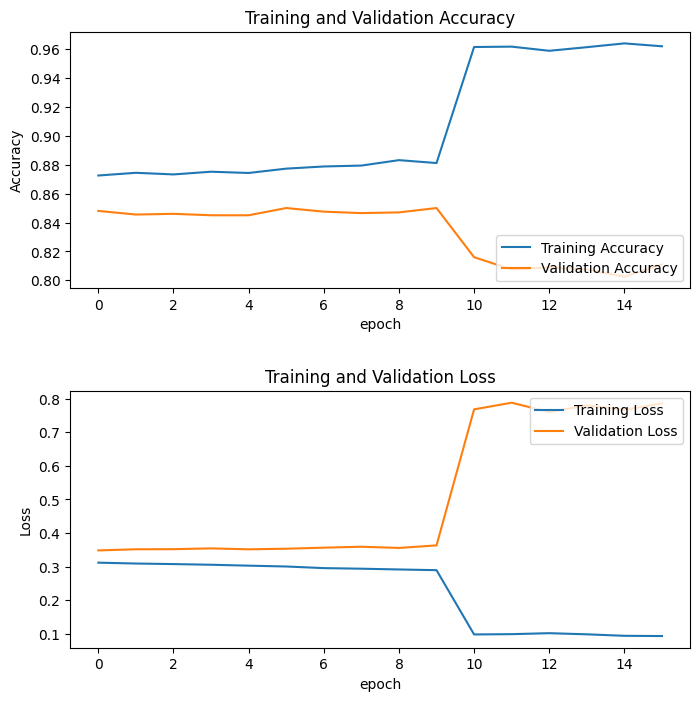

In [112]:
compare_historys(history_1,history_2)

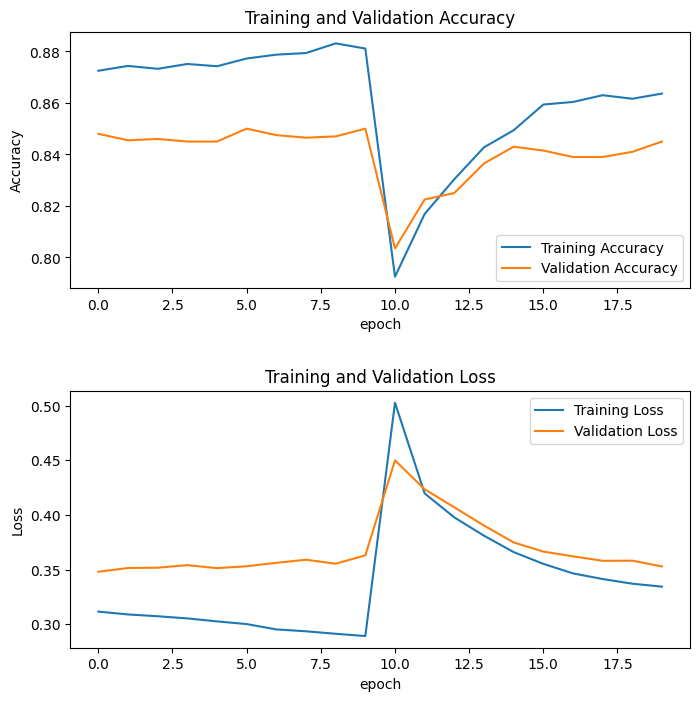

In [115]:
compare_historys(history_1,history_3)

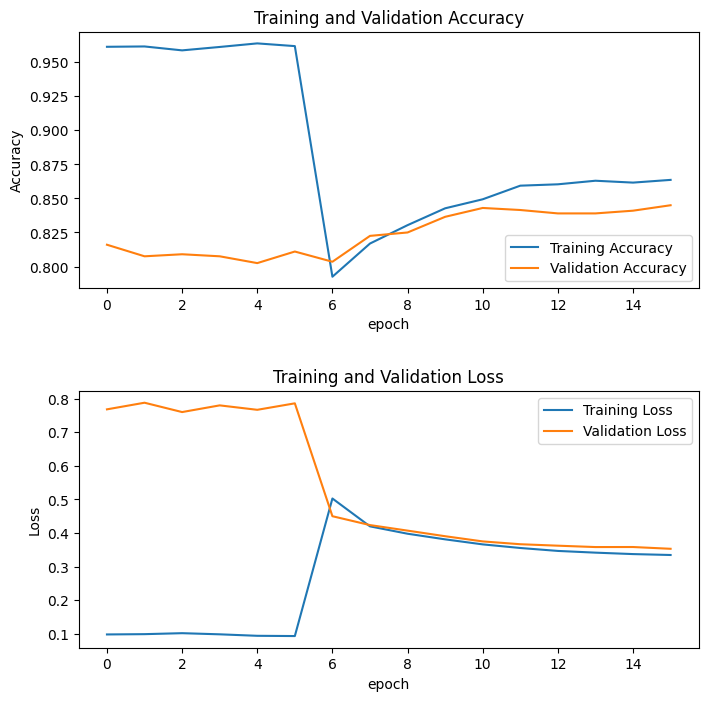

In [116]:
compare_historys(history_2,history_3)

In [124]:
model_1.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8559 - loss: 0.3508


[0.36306139826774597, 0.8500000238418579]

In [127]:
model_2.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2507 - loss: 0.7815


[0.7788299918174744, 0.24449999630451202]

In [126]:
model_3.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8511 - loss: 0.3456


[0.35289379954338074, 0.8450000286102295]

In [133]:
import matplotlib.pyplot as plt


def plot_training_history(history):
    """
    Visualizes the training and validation accuracy and loss over epochs.

    Args:
        history: The History object returned by TensorFlow's model.fit() method.
    """

    # Set the figure size for better visualization
    plt.figure(figsize=(12, 6))

    # Plotting Training and Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')  # Label for x-axis
    plt.ylabel('Accuracy')  # Label for y-axis
    plt.legend()  # Show legend
    plt.title('Training vs Validation Accuracy')  # Title of the first plot

    # Plotting Training and Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')  # Label for x-axis
    plt.ylabel('Loss')  # Label for y-axis
    plt.legend()  # Show legend
    plt.title('Training vs Validation Loss')  # Title of the second plot

    # Display the plots
    plt.show()


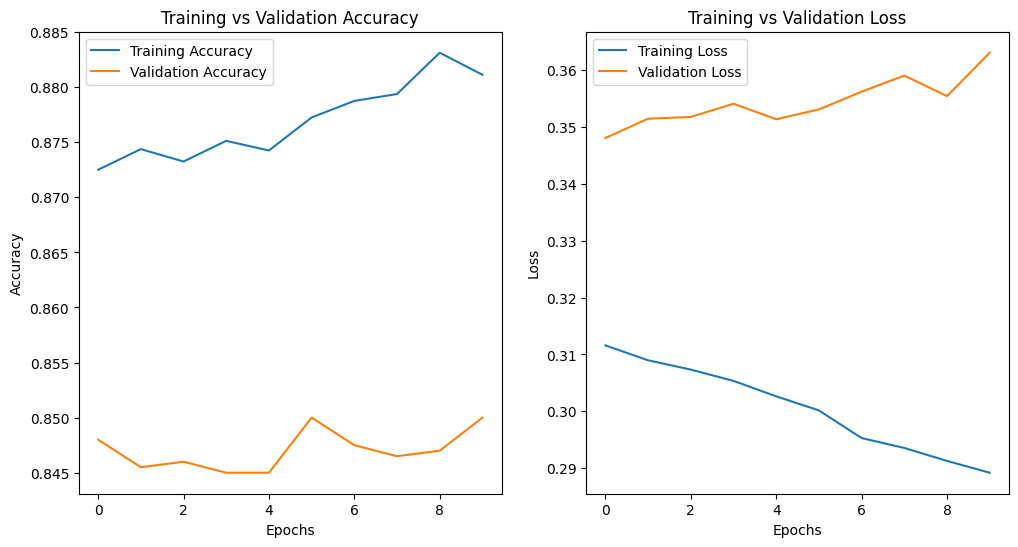

In [130]:
plot_training_history(history_1)

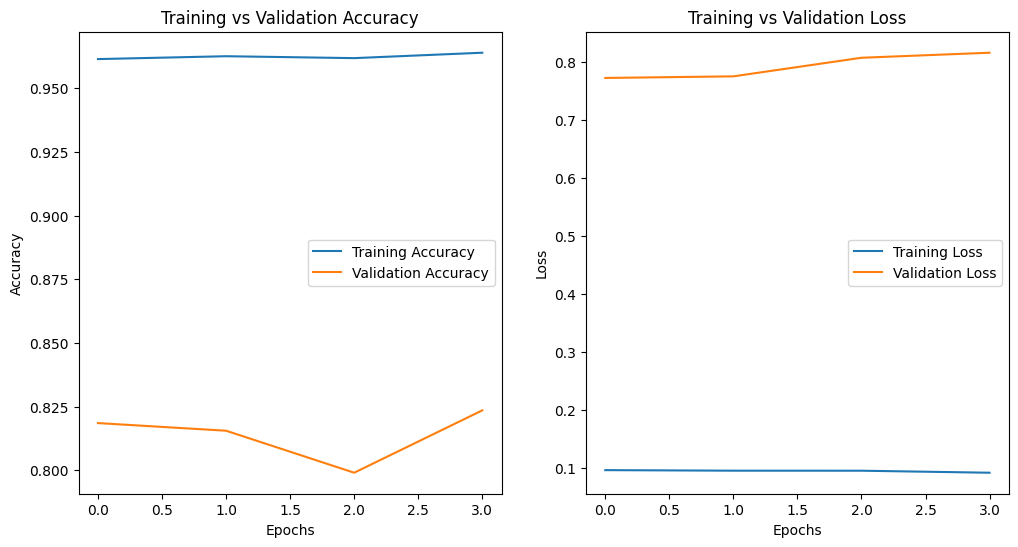

In [131]:
plot_training_history(history_2)

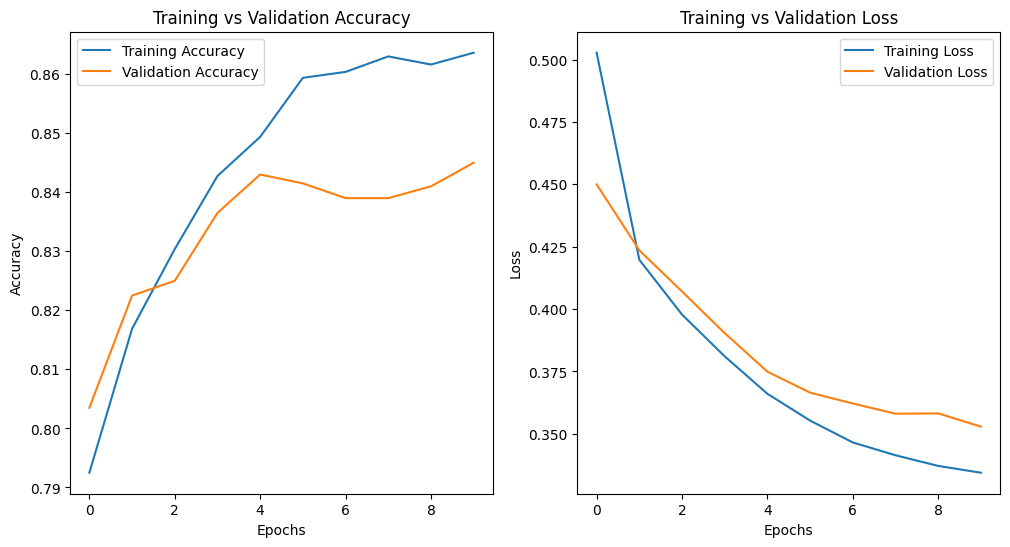

In [132]:
plot_training_history(history_3)